In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import plot_partregress_grid

In [ ]:
caminhoArquivo = 'covid.xlsx'
dataSet = pd.read_excel(caminhoArquivo)
dataSet.head()

,Estado,Estimativa leitos,População,Domicilios com rede de esgoto,Mortes
0,AC,1500,814380,0.477,735
1,AL,5000,2897092,0.406,2010
2,AM,1500,1480757,0.470,5400
3,AP,700,845731,0.207,850
4,BA,20000,10755879,0.595,9850


In [ ]:
dataSet = dataSet.drop(columns=['Estado'])
dataSet.head()

,Estimativa leitos,População,Domicilios com rede de esgoto,Mortes
0,1500,814380,0.477,735
1,5000,2897092,0.406,2010
2,1500,1480757,0.470,5400
3,700,845731,0.207,850
4,20000,10755879,0.595,9850


In [ ]:
X = dataSet[['Estimativa leitos', 'População', 'Domicilios com rede de esgoto']]
X = sm.add_constant(X)
y = dataSet['Mortes']
model = sm.OLS(y, X).fit()

In [ ]:
regression_summary = model.summary()
print(regression_summary)

                            OLS Regression Results                            
Dep. Variable:                 Mortes   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     83.82
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           1.57e-12
Time:                        23:43:28   Log-Likelihood:                -250.91
No. Observations:                  27   AIC:                             509.8
Df Residuals:                      23   BIC:                             515.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                        Variable       VIF
0                          const  8.641591
1              Estimativa leitos  1.005170
2                      População  1.474755
3  Domicilios com rede de esgoto  1.473545


Text(0.5, 1.0, 'Domicilios com rede de esgoto vs Mortes')

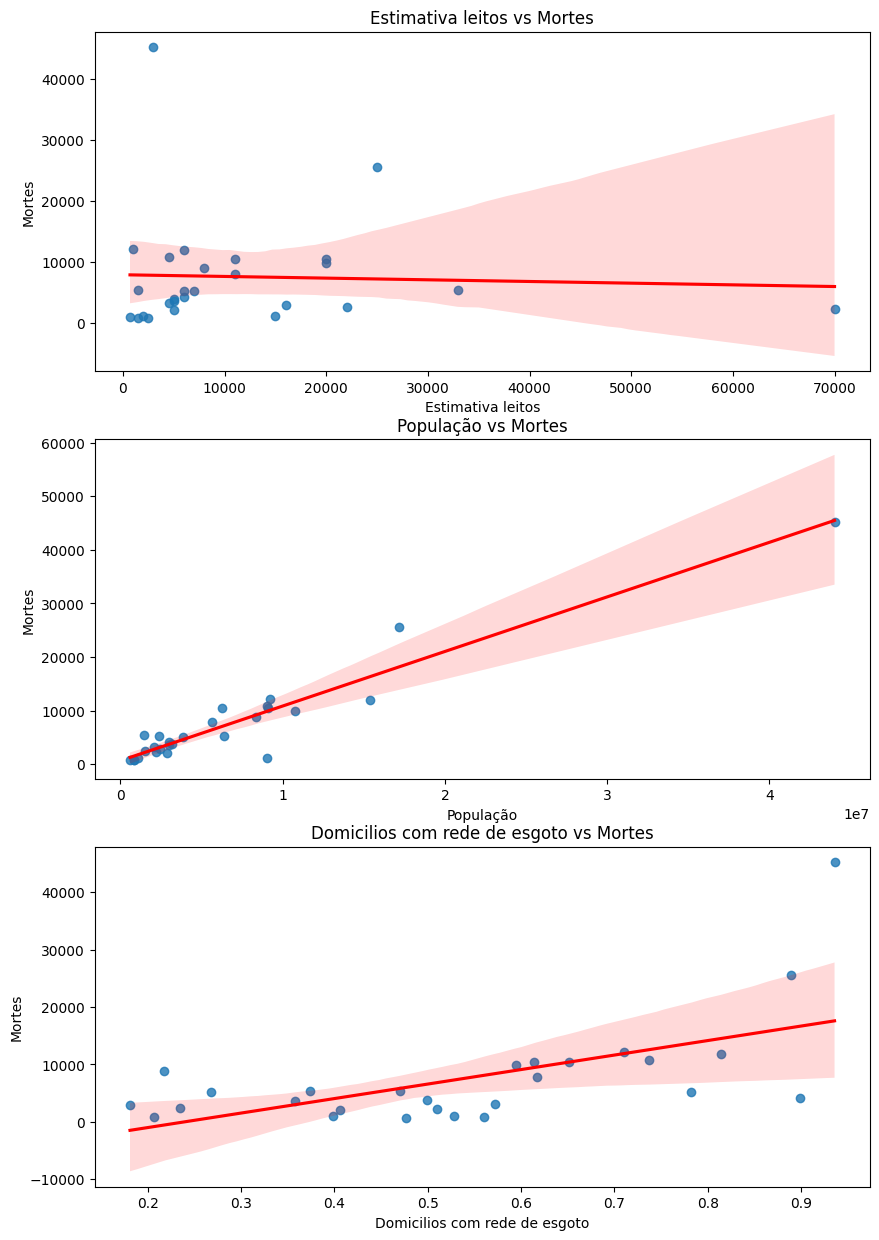

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

sns.regplot(x=dataSet['Estimativa leitos'], y=y, ax=axes[0], line_kws={"color": "red"})
axes[0].set_title('Estimativa leitos vs Mortes')

sns.regplot(x=dataSet['População'], y=y, ax=axes[1], line_kws={"color": "red"})
axes[1].set_title('População vs Mortes')

sns.regplot(x=dataSet['Domicilios com rede de esgoto'], y=y, ax=axes[2], line_kws={"color": "red"})
axes[2].set_title('Domicilios com rede de esgoto vs Mortes')


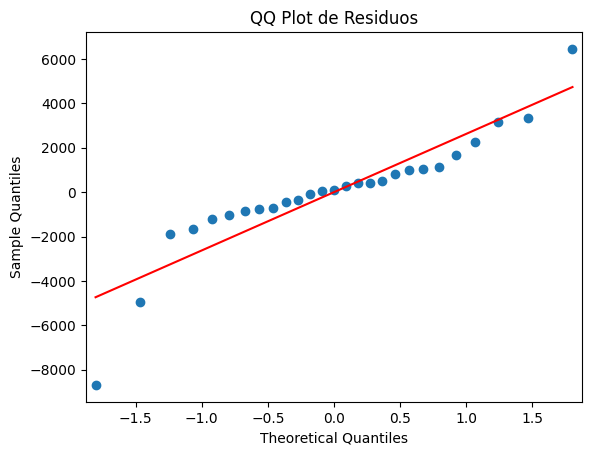

In [ ]:
sm.qqplot(residuals, line='s')
plt.title('QQ Plot de Residuos')
plt.show()